# Regressão Logística #

<img src='foto.jpg'>

A regressão logística é um método para ajustar uma curva de regressão, y = f (x), quando y é uma variável categórica. O uso típico deste modelo é prever y dado um conjunto de preditores x. Os preditores podem ser contínuos, categóricos ou uma mistura de ambos.

Para entender melhor o conseito matemático por trás da Regressão Logística, assista esse [Vídeo](https://www.youtube.com/watch?v=EocjYP5h0cE)

Neste estudo chamo o modelo de "regressão logística binomial", uma vez que a variável resposta é binária, no entanto, regressão logística também pode ser usada para prever uma variável dependente que pode assumir mais de 2 valores. Neste segundo caso chamamos o modelo de "regressão logística multinomial". Um exemplo típico, por exemplo, seria a classificação de filmes entre "Divertido", "indiferente" ou "chato".

### Implementação de regressão logística em R ###

O **R** torna torna a tarefa de ajustar um modelo de regressão logística muito facíl. A função a ser chamada é glm() e o processo de ajuste não é tão diferente do usado na regressão linear, a função lm(). Neste estudo eu vou ajustar um modelo de regressão logística binária e explicar cada passo.

### Preparar o Data Set ###

Vamos trabalhar com um dataset famoso, o Titanic. Você poderá saber mais sobre esse dataset e baixa-lo [aqui](https://www.kaggle.com/c/titanic)

In [1]:
dado_cru_de_treinamento <- read.csv('train.csv',header=T,na.strings=c(""))

In [2]:
head(dado_cru_de_treinamento, 3)

PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NA,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NA,S


Agora precisamos verificar se há valores nulos(null) e ver quantos valores distintos existem para cada variável usando a função sapply () que aplica a função passada como argumento para cada coluna do dataframe.

In [3]:
sapply(dado_cru_de_treinamento,function(x) sum(is.na(x)))
sapply(dado_cru_de_treinamento, function(x) length(unique(x)))

PassengerId    Survived      Pclass        Name         Sex         Age 
          0           0           0           0           0         177 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          0           0           0           0         687           2

PassengerId    Survived      Pclass        Name         Sex         Age 
        891           2           3         891           2          89 
      SibSp       Parch      Ticket        Fare       Cabin    Embarked 
          7           7         681         248         148           4

Ter uma visão sobre os valores nulls pode ser útil. No R há um pacote chamado Amelia que tem uma função de plotagem especial chamada missmap () que irá traçar o conjunto de dados e realçar os valores em falta:

Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.7.4, built: 2015-12-05)
## Copyright (C) 2005-2017 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 


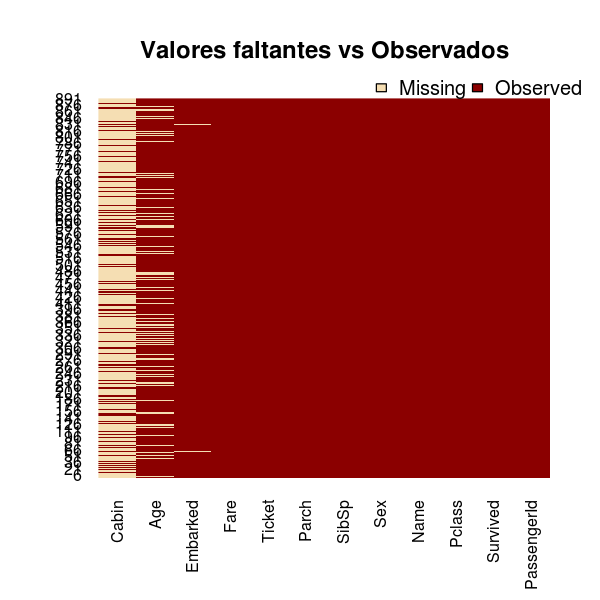

In [4]:
library(Amelia)

options(repr.plot.width=5, repr.plot.height=5)

missmap(dado_cru_de_treinamento, main = "Valores faltantes vs Observados")

A coluna Cabin tem muitos valores faltantes, não vamos usá-lo. Também não usaremos a coluna PassengerId, uma vez que é apenas um índice e também a Ticket pode ficar de fora.

In [5]:
data <- subset(dado_cru_de_treinamento,select=c(2,3,5,6,7,8,10,12))

A coluna Age tbm tem vários dados faltantes, vamos substitui-los pela média das idades.

In [6]:
data$Age[is.na(data$Age)] <- mean(data$Age,na.rm=T)

No que diz respeito às variáveis categóricas, as funções read.table() ou read.csv(), por padrão, codificarão as variáveis categóricas como fatores. Um fator é como R relaciona variáveis categóricas.
Podemos verificar a codificação usando as seguintes linhas de código:

In [7]:
is.factor(data$Sex)
is.factor(data$Embarked)

[1] TRUE

[1] TRUE

Para uma melhor compreensão de como R vai lidar com as variáveis categóricas, podemos usar a função contrasts(). Esta função irá nos mostrar como as variáveis foram dummyfied, ou seja, tornadas indicadores pelo R e como interpretá-las em um modelo.

In [8]:
contrasts(data$Sex)

,male
female,0
male,1


In [9]:
contrasts(data$Embarked)

,Q,S
C,0,0
Q,1,0
S,0,1


Por exemplo, você pode ver que na variável sexo, feminino será usado como a referência. Quanto aos valores em falta em Embarked, uma vez que existem apenas dois, vamos descartar essas duas linhas

In [10]:
data <- data[!is.na(data$Embarked),]
rownames(data) <- NULL

Antes de prosseguir com a aplicação do modelo, deixe-me lembrar o quão importante é a limpeza e a formatação dos dados. Este passo de pré-processamento é frequentemente crucial para obter um bom ajuste do modelo e uma melhor capacidade de previsão.

### Implementando o Modelo ###

Vamos dividir nosso dataset data em dois, um de treinamento, chamaremos de train, e outro de teste que chamaremos de test. O dataset de treinamento será usado para ajustar nosso modelo para depois testar sobre o dataset test.

In [11]:
treinamento <- data[1:800,]
teste <- data[801:889,]

Agora vamos rodar nosso modelo:

In [12]:
modelo <- glm(Survived ~.,family=binomial(link='logit'),data=treinamento)

Usando a função summary() podemos obter algumas estatísticas do modelo

In [13]:
summary(modelo)


Call:
glm(formula = Survived ~ ., family = binomial(link = "logit"), 
    data = treinamento)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.6064  -0.5954  -0.4254   0.6220   2.4165  

Coefficients:
             Estimate Std. Error z value Pr(>|z|)    
(Intercept)  5.137627   0.594998   8.635  < 2e-16 ***
Pclass      -1.087156   0.151168  -7.192 6.40e-13 ***
Sexmale     -2.756819   0.212026 -13.002  < 2e-16 ***
Age         -0.037267   0.008195  -4.547 5.43e-06 ***
SibSp       -0.292920   0.114642  -2.555   0.0106 *  
Parch       -0.116576   0.128127  -0.910   0.3629    
Fare         0.001528   0.002353   0.649   0.5160    
EmbarkedQ   -0.002656   0.400882  -0.007   0.9947    
EmbarkedS   -0.318786   0.252960  -1.260   0.2076    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 1065.39  on 799  degrees of freedom
Residual deviance:  709.39  on 791  degrees of freedom


Podemos notar que Pclass, Sexmale e Age foram as que tiveram menor p-valor, e foram marcadas com 3 estrelas. Portanto, essas variáveis são as mais significativas para nosso objetivo. Sexo foi o que obteve o menor p-valor, sugerindo haver forte relação entre sobrevivência e sexo. 

Vamos usar a ANOVA para analizar a tabela de variância.

In [14]:
anova(modelo, test="Chisq")

,Df,Deviance,Resid. Df,Resid. Dev,Pr(>Chi)
NULL,NA,NA,799,1065.3922,NA
Pclass,1,83.6069449,798,981.7853,6.036064e-20
Sex,1,240.0135513,797,741.7717,3.906166e-54
Age,1,17.4946765,796,724.2770,2.881133e-05
SibSp,1,10.8423921,795,713.4346,9.920249e-04
Parch,1,0.8630972,794,712.5715,3.528734e-01
Fare,1,0.9942053,793,711.5773,3.187167e-01
Embarked,2,2.1873120,791,709.3900,3.349895e-01


A diferença entre o desvio nulo e o desvio residual mostra como nosso modelo está indo contra o Modelo nulo (um modelo com apenas o intercepto). Quanto maior essa lacuna, melhor. Analisando a tabela podemos ver que o desvio diminui ao adicionar uma variável de cada vez. Novamente, adicionando Pclass, Sexo e Idade reduz significativamente  o desvio residual. As outras variáveis parecem melhorar o modelo mesmo que a variável SibSp tenha um baixo P-valor. Um grande p-valor aqui indica que o modelo sem a variável explica mais ou menos a mesma
quantidade de variação. Em última análise, o que você gostaria de ver é uma queda significativa no desvio e AIC.

In [15]:
library(pscl)

Loading required package: MASS
Loading required package: lattice
Classes and Methods for R developed in the

Political Science Computational Laboratory

Department of Political Science

Stanford University

Simon Jackman

hurdle and zeroinfl functions by Achim Zeileis



In [16]:
pR2(modelo)

llh      llhNull           G2     McFadden         r2ML         r2CU 
-354.6950111 -532.6961008  356.0021794    0.3341513    0.3591775    0.4880244

### Avaliar a capacidade de previsão do modelo ###

Nos passos acima, avaliamos brevemente a adequação e estatísticas do modelo, agora gostaríamos de ver como o modelo é bom para prever y, nossa variável resposta, em um novo conjunto de dados. Ao definir o parâmetro type='response', R irá produzir probabilidades na forma de P (y = 1 | X). Nosso limite de decisão será 0,5. Se P (y = 1 | X)> 0,5 então y = 1 caso contrário Y = 0. Note que para algumas aplicações diferentes limites de decisão podem assumir valores mais apropriados. 

In [17]:
fitted.results <- predict(modelo, newdata = subset(teste,select=c(2,3,4,5,6,7,8)), type='response')

In [18]:
# as probabilidades maiores que 0.5 serão classificadas com 1, ou seja, sobrevivente
fitted.results <- ifelse(fitted.results > 0.5,1,0)

In [19]:
# obtendo as classificações erradas, ou seja,
# as pessoas que foram classificadas como sobreviventes
# mas não sobreviveram e vice versa
misClasificError <- mean(fitted.results != teste$Survived)

In [20]:
print(paste('Acurácia',1-misClasificError))

[1] "Acurácia 0.842696629213483"


A acurácia de 0,84 no conjunto de teste é um bom resultado. No entanto, tenha em mente que este resultado é,
dependente da divisão manual dos dados que eu fiz anteriormente, portanto, se você deseja um valor mais acurado, seria melhor executar algum tipo de validação cruzada, como a validação cruzada de k-fold.

Como último passo, vamos traçar a curva [ROC](http://www.portalaction.com.br/analise-de-regressao/45-predicao) e calcular a [AUC](http://www2.ime.unicamp.br/sinape/sites/default/files/souzarm_versao_1.pdf) (área sob a curva) que são medidas típicas para calcular desempenho de um classificador binário.

O ROC é uma curva gerada pela representação da taxa positiva real (TPR) em relação à taxa de falso positivo (FPR) de acordo com várias definições de limiar enquanto que a AUC é a área sob a curva ROC. Como essa regra geral, um modelo com boa capacidade preditiva deve ter uma AUC mais próxima de 1 (1 é ideal) do que de 0,5.

In [21]:
library(ROCR)

Loading required package: gplots

Attaching package: ‘gplots’

The following object is masked from ‘package:stats’:

    lowess



In [ ]:
Aqui está nosso R

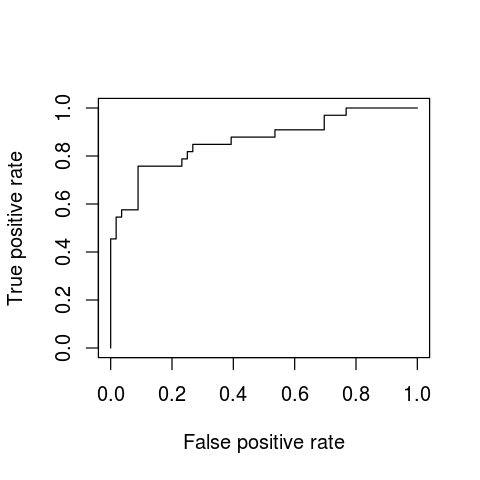

In [26]:
options(repr.plot.width=4, repr.plot.height=4)

p <- predict(modelo, newdata=subset(teste,select=c(2,3,4,5,6,7,8)), type="response")
pr <- prediction(p, teste$Survived)
prf <- performance(pr, measure = "tpr", x.measure = "fpr")
plot(prf)